In [1]:
import pandas as pd

In [17]:
weather={
    'day':['1/1/2017','1/2/2017','1/3/2017','1/4/2017','1/5/2017','1/6/2017'],
    'temperature':[32,35,28,24,32,31],
    'windspeed':[6,7,2,7,4,2],
    'event':['Rain','Sunny','Snow','Snow','Rain','Sunny'],
}
weather=pd.DataFrame(weather)
weather

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


In [18]:
weather.set_index('event',inplace=True)
weather[weather.temperature>22].loc['Snow'].day

event
Snow    1/3/2017
Snow    1/4/2017
Name: day, dtype: object

In [4]:
stock=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\stock_codebasics\stock.csv',header=1) #skiprows=1 
stock.head()

,GOOGL,27.82,87,845,larry page
0,WMT,4.61,484,65,n.a.
1,MSFT,-1,85,64,bill gates
2,RIL,not available,50,1023,mukesh ambani
3,TATA,5.6,-1,n.a.,ratan tata


In [5]:
stock=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\stock_codebasics\stock.csv',header=None,names=['tickers','eps','revenue','price','people']) 
stock.head()

,tickers,eps,revenue,price,people
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,n.a.
3,MSFT,-1,85,64,bill gates
4,RIL,not available,50,1023,mukesh ambani


In [6]:
stock=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\stock_codebasics\stock.csv',header=None,names=['tickers','eps','revenue','price','people'],na_values=['not available','n.a.']) 
stock.head()

,tickers,eps,revenue,price,people
0,tickers,eps,revenue,price,people
1,GOOGL,27.82,87,845,larry page
2,WMT,4.61,484,65,NaN
3,MSFT,-1,85,64,bill gates
4,RIL,NaN,50,1023,mukesh ambani


In [7]:
stock=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\stock_codebasics\stock.csv',na_values={
    'eps':['not available','n.a.'],
    'revenue':[-1],
    'people':['not available','n.a.'],
    'price':['n.a.']
    
}) 
stock.head()

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,845.0,larry page
1,WMT,4.61,484.0,65.0,NaN
2,MSFT,-1.00,85.0,64.0,bill gates
3,RIL,NaN,50.0,1023.0,mukesh ambani
4,TATA,5.60,NaN,NaN,ratan tata


In [8]:
stock.to_csv(r'C:\Users\JOY STARK\Desktop\Datasets\stock_codebasics\new.csv',index=False)

In [9]:
stock.to_csv(r'C:\Users\JOY STARK\Desktop\Datasets\stock_codebasics\new1.csv',columns=['tickers','eps'])

In [10]:
#stock.to_csv(r'C:\Users\JOY STARK\Desktop\Datasets\stock_codebasics\new.csv',header=False)

In [18]:
df=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\weather\weather\weather.csv',parse_dates=['day'])
df.set_index('day',inplace=True)
#df.fillna({
#    'event':'no event',
#    'windspeed':0,
#    'temperature':0
#})

df.fillna(method='bfill',limit=1)

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [19]:
df.iloc[8].temperature

40.0

In [22]:
df.interpolate()
df.dropna(thresh=2)

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-07,32.0,NaN,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [23]:
dt=pd.date_range('01-01-2017','1-11-2017')
index=pd.DatetimeIndex(dt)
df.reindex(index)


,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


In [15]:
import numpy as np
df=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\weather\weather\replace.csv')
df.head()
df.replace({
    'temperature':-99999,
    'windspeed':-99999,
    'event':'0'
},np.NaN)
df.replace({
    -99999:0,
    '0':'no event'
})

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,0,7,Sunny
2,1/3/2017,28,0,Snow
3,1/4/2017,0,7,no event
4,1/5/2017,32,0,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,no event


In [16]:
new_df=df.replace({
    'windspeed':'[A-Za-z]',
    'temperature':'[A-Za-z]'
},'',regex=True)

In [24]:
df=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\weather\weather\groupby.csv',parse_dates=['day'])
df.set_index('day',inplace=True)
print(df)
g=df.groupby('city')
print('\n')
print(g)
print('\n')
for city,city_g in g:
    print(city)
    print(city_g)

                city  temperature  windspeed   event
day                                                 
2017-01-01  new york           32          6    Rain
2017-01-02  new york           36          7   Sunny
2017-01-03  new york           28         12    Snow
2017-01-04  new york           33          7   Sunny
2017-01-01    mumbai           90          5   Sunny
2017-01-02    mumbai           85         12     Fog
2017-01-03    mumbai           87         15     Fog
2017-01-04    mumbai           92          5    Rain
2017-01-01     paris           45         20   Sunny
2017-01-02     paris           50         13  Cloudy
2017-01-03     paris           54          8  Cloudy
2017-01-04     paris           42         10  Cloudy




mumbai
              city  temperature  windspeed  event
day                                              
2017-01-01  mumbai           90          5  Sunny
2017-01-02  mumbai           85         12    Fog
2017-01-03  mumbai           87         15    F

In [25]:
g.get_group('paris').max().temperature

54

In [26]:
g.max()

,temperature,windspeed,event
city,,,
mumbai,92,15,Sunny
new york,36,12,Sunny
paris,54,20,Sunny


In [20]:
g.median()

,temperature,windspeed
city,,
mumbai,88.5,8.5
new york,32.5,7.0
paris,47.5,11.5


In [21]:
print(g.describe())
g.get_group('paris').describe()

         temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0  


,temperature,windspeed
count,4.000000,4.000000
mean,47.750000,12.750000
std,5.315073,5.251984
min,42.000000,8.000000
25%,44.250000,9.500000
50%,47.500000,11.500000
75%,51.000000,14.750000
max,54.000000,20.000000


In [20]:
d1={
    'city':['Mumbai','Delhi','Bengalore'],
    'temperature':[32,45,30],
    'humidity':[80,60,75]
}
data1=pd.DataFrame(d1)
data1

,city,temperature,humidity
0,Mumbai,32,80
1,Delhi,45,60
2,Bengalore,30,75


In [21]:
d2={
    'city':['New York','Chicago','New Jersy'],
    'temperature':[12,10,16],
    'humidity':[30,20,40]
}
data2=pd.DataFrame(d2)
data2
print(data1)
print('\n')
print(data2)
df=pd.concat([data1,data2])
df

        city  temperature  humidity
0     Mumbai           32        80
1      Delhi           45        60
2  Bengalore           30        75


        city  temperature  humidity
0   New York           12        30
1    Chicago           10        20
2  New Jersy           16        40


,city,temperature,humidity
0,Mumbai,32,80
1,Delhi,45,60
2,Bengalore,30,75
0,New York,12,30
1,Chicago,10,20
2,New Jersy,16,40


In [22]:
df=pd.concat([data1,data2],ignore_index=True)
df

,city,temperature,humidity
0,Mumbai,32,80
1,Delhi,45,60
2,Bengalore,30,75
3,New York,12,30
4,Chicago,10,20
5,New Jersy,16,40


In [26]:
df=pd.concat([data1,data2],keys=['India','US']) 
df

city  temperature  humidity
India 0     Mumbai           32        80
      1      Delhi           45        60
      2  Bengalore           30        75
US    0   New York           12        30
      1    Chicago           10        20
      2  New Jersy           16        40

In [28]:
temperature_df=pd.DataFrame({
    'city':['Delhi','Bengalore','Mumbai'],
    'temperature':[32,45,30],    
},index=[0,1,2])
winspeed_df=pd.DataFrame({
    'city':['Mumbai','Delhi','Bengalore'],
    'winspeed':[7,12,9]
},index=[2,0,1])

dff=pd.concat([temperature_df,winspeed_df],axis=1)
dff

,city,temperature,city,winspeed
0,Delhi,32,Delhi,12
1,Bengalore,45,Bengalore,9
2,Mumbai,30,Mumbai,7


In [27]:
event=pd.Series(data=['Dry','Humid','Humid'],name='event')

In [28]:
dff=pd.concat([temperature_df,event],axis=1)
dff

,city,temperature,event
0,Delhi,32,Dry
1,Bengalore,45,Humid
2,Mumbai,30,Humid


In [29]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35


In [30]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


In [31]:
df=pd.merge(df1,df2,on='city')
df

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [32]:

df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


In [33]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


In [34]:
df3=pd.merge(df1,df2,on='city',how='inner')
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [35]:
df3=pd.merge(df1,df2,on='city',how='outer')
df3

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,35.0,NaN
3,baltimore,38.0,NaN
4,san diego,NaN,71.0


In [36]:
df3=pd.merge(df1,df2,on='city',how='right')
df3

,city,temperature,humidity
0,new york,21.0,68
1,chicago,14.0,65
2,san diego,NaN,71


In [37]:
df3=pd.merge(df1,df2,on='city',how='left',indicator=True)
df3

,city,temperature,humidity,_merge
0,new york,21,68.0,both
1,chicago,14,65.0,both
2,orlando,35,NaN,left_only
3,baltimore,38,NaN,left_only


In [38]:
df3=pd.merge(df1,df2,on='city',how='outer',indicator=True)
df3

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,baltimore,38.0,NaN,left_only
4,san diego,NaN,71.0,right_only


In [39]:

df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df1

,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,71
3,baltimore,38,75


In [40]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df2


,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,san diego,35,71


In [41]:
df3=pd.merge(df1,df2,on='city',how='outer',suffixes=('_first','_second'))
df3

,city,temperature_first,humidity_first,temperature_second,humidity_second
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


In [42]:
#pivot

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\JOY STARK\Desktop\Datasets\weather\weather\weather1.csv")
df


,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [9]:
k=df.pivot(index='date',columns='city')
#k.columns.name=['keys']
print(k)
k.loc[['5/1/2017','5/2/2017'],['temperature']]
#k.xs(key='temperature',level=0,axis=1)

         temperature                 humidity                
city         beijing mumbai new york  beijing mumbai new york
date                                                         
5/1/2017          80     75       65       26     80       56
5/2/2017          77     78       66       30     83       58
5/3/2017          79     82       68       35     85       60


temperature                
city         beijing mumbai new york
date                                
5/1/2017          80     75       65
5/2/2017          77     78       66

In [10]:
p=df.pivot(index='city',columns='date',values='humidity')
p.loc['beijing'][['5/1/2017','5/3/2017']]


date
5/1/2017    26
5/3/2017    35
Name: beijing, dtype: int64

In [46]:
#pivot_table


In [47]:
df=pd.read_csv(r"C:\Users\JOY STARK\Desktop\Datasets\weather\weather\weather2.csv")

In [48]:
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


In [60]:
print(df.pivot(index='city',columns='date'))
c=df.pivot(index='city',columns='date')
print('\n')
df.pivot_table(index='city',columns='date',values='temperature',aggfunc="sum",margins=True)

         temperature                   humidity                  
date        5/1/2017 5/2/2017 5/3/2017 5/1/2017 5/2/2017 5/3/2017
city                                                             
beijing           80       77       79       26       30       35
mumbai            75       78       82       80       83       85
new york          65       66       68       56       58       60




date,5/1/2017,5/2/2017,5/3/2017,All
city,,,,
beijing,80,77,79,236
mumbai,75,78,82,235
new york,65,66,68,199
All,220,221,229,670


In [59]:
df.pivot_table(index='city',columns='date',values='temperature',aggfunc="sum",margins=True)

date,5/1/2017,5/2/2017,5/3/2017,All
city,,,,
beijing,80,77,79,236
mumbai,75,78,82,235
new york,65,66,68,199
All,220,221,229,670


In [64]:
df = pd.read_csv(r"C:\Users\JOY STARK\Desktop\Datasets\weather\weather\weather3.csv")
df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,61,54
2,5/3/2017,new york,70,60
3,12/1/2017,new york,30,50
4,12/2/2017,new york,28,52
5,12/3/2017,new york,25,51


In [65]:
#df.date=pd.DatetimeIndex(df.date)
df.date=pd.to_datetime(df.date)
df

,date,city,temperature,humidity
0,2017-05-01,new york,65,56
1,2017-05-02,new york,61,54
2,2017-05-03,new york,70,60
3,2017-12-01,new york,30,50
4,2017-12-02,new york,28,52
5,2017-12-03,new york,25,51


In [66]:
df.pivot_table(index=pd.Grouper(freq='M',key='date'),columns='city')

,humidity,temperature
city,new york,new york
date,,
2017-05-31,56.666667,65.333333
2017-12-31,51.000000,27.666667


In [68]:
df=pd.read_csv(r"C:\Users\JOY STARK\Desktop\Datasets\weather\weather\melt.csv")
print(df)
print('\n')
melted_df=pd.melt(df,id_vars='day',var_name='city',value_name='temperature')
print(melted_df)

         day  chicago  chennai  berlin
0     Monday       32       75      41
1    Tuesday       30       77      43
2  Wednesday       28       75      45
3   Thursday       22       82      38
4     Friday       30       83      30
5   Saturday       20       81      45
6     Sunday       25       77      47


          day     city  temperature
0      Monday  chicago           32
1     Tuesday  chicago           30
2   Wednesday  chicago           28
3    Thursday  chicago           22
4      Friday  chicago           30
5    Saturday  chicago           20
6      Sunday  chicago           25
7      Monday  chennai           75
8     Tuesday  chennai           77
9   Wednesday  chennai           75
10   Thursday  chennai           82
11     Friday  chennai           83
12   Saturday  chennai           81
13     Sunday  chennai           77
14     Monday   berlin           41
15    Tuesday   berlin           43
16  Wednesday   berlin           45
17   Thursday   berlin           38
18

In [26]:
import pandas as pd
df=pd.read_excel(r'C:\Users\JOY STARK\Desktop\Datasets\stocks\stocks.xlsx',header=[0,1])
print(df)
df.xs(key='Facebook',axis=1,drop)

  Unnamed: 0_level_0    Price                  Price to earnings ratio (P/E)  \
             Company Facebook Google Microsoft                      Facebook   
0         2017-06-05      155    955        66                         37.10   
1         2017-06-06      150    987        69                         36.98   
2         2017-06-07      153    963        62                         36.78   
3         2017-06-08      155   1000        61                         36.11   
4         2017-06-09      156   1012        66                         37.07   

                    
  Google Microsoft  
0   32.0     30.31  
1   31.3     30.56  
2   31.7     30.46  
3   31.2     30.11  
4   30.0     31.00  


KeyError: 'Facebook'

In [60]:
k=df.stack()
#k.index.names=['índex','Company']


Price  Price to earnings ratio (P/E) Unnamed: 0_level_0
0 Company       NaN                            NaN         2017-06-05
  Facebook    155.0                          37.10                NaT
  Google      955.0                          32.00                NaT
  Microsoft    66.0                          30.31                NaT
1 Company       NaN                            NaN         2017-06-06
  Facebook    150.0                          36.98                NaT
  Google      987.0                          31.30                NaT
  Microsoft    69.0                          30.56                NaT
2 Company       NaN                            NaN         2017-06-07
  Facebook    153.0                          36.78                NaT
  Google      963.0                          31.70                NaT
  Microsoft    62.0                          30.46                NaT
3 Company       NaN                            NaN         2017-06-08
  Facebook    155.0                          36.11                NaT
  Google     1000.0                          31.20                NaT
  Microsoft    61.0                          30.11                NaT
4 Company       NaN                            NaN         2017-06-09
  Facebook    156.0                          37.07                NaT
  Google     1012.0                          30.00                NaT
  Microsoft    66.0                          31.00                NaT

In [61]:
k=df.stack(level=0)
k.iloc[:,[0,1]]

Company  Facebook
0 Price                                NaT    155.00
  Price to earnings ratio (P/E)        NaT     37.10
  Unnamed: 0_level_0            2017-06-05       NaN
1 Price                                NaT    150.00
  Price to earnings ratio (P/E)        NaT     36.98
  Unnamed: 0_level_0            2017-06-06       NaN
2 Price                                NaT    153.00
  Price to earnings ratio (P/E)        NaT     36.78
  Unnamed: 0_level_0            2017-06-07       NaN
3 Price                                NaT    155.00
  Price to earnings ratio (P/E)        NaT     36.11
  Unnamed: 0_level_0            2017-06-08       NaN
4 Price                                NaT    156.00
  Price to earnings ratio (P/E)        NaT     37.07
  Unnamed: 0_level_0            2017-06-09       NaN

In [72]:
import pandas as pd
hand_data=pd.read_excel(r'C:\Users\JOY STARK\Desktop\Datasets\handednesscrosstab\survey.xls')
hand_data


,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [73]:
pd.crosstab(hand_data.Nationality,hand_data.Handedness)

Handedness,Left,Right
Nationality,,
Bangadesh,2,0
China,2,1
India,2,1
USA,1,3


In [74]:
pd.crosstab(hand_data.Sex,hand_data.Handedness,margins=True)

Handedness,Left,Right,All
Sex,,,
Female,2,3,5
Male,5,2,7
All,7,5,12


In [75]:
pd.crosstab(hand_data.Nationality,[hand_data.Handedness,hand_data.Sex],margins=True,normalize='index')

C:\Users\JOY STARK\Anaconda3\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


Handedness       Left               Right          
Sex            Female      Male    Female      Male
Nationality                                        
Bangadesh    0.500000  0.500000  0.000000  0.000000
China        0.333333  0.333333  0.333333  0.000000
India        0.000000  0.666667  0.000000  0.333333
USA          0.000000  0.250000  0.500000  0.250000
All          0.166667  0.416667  0.250000  0.166667

In [76]:
t=pd.crosstab(hand_data.Sex,[hand_data.Handedness,hand_data.Nationality],values=hand_data.Age,aggfunc="mean")
print(t)
t.loc['Female']['Left']

Handedness       Left                   Right            
Nationality Bangadesh China India   USA China India   USA
Sex                                                      
Female           31.0  58.0   NaN   NaN  52.0   NaN  20.5
Male             25.0  43.0  33.0  22.0   NaN  37.0  19.0


Nationality
Bangadesh    31.0
China        58.0
India         NaN
USA           NaN
Name: Female, dtype: float64

In [ ]:
#DatetimeIndex & Resampling

In [ ]:
xyz=pd.date_range('1-1-2011','2-2-2018')
index=pd.DatetimeIndex(xyz,name='Date')

In [3]:
df=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\apple historical data\AAPL.csv')
df.Date=pd.to_datetime(df.Date)
df.set_index('Date',inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-28,155.789993,156.330002,153.660004,156.300003,153.986359,26192100
2019-01-29,156.250000,158.130005,154.110001,154.679993,152.390320,41587200
2019-01-30,163.250000,166.149994,160.229996,165.250000,162.803864,61109800
2019-01-31,166.110001,169.000000,164.559998,166.440002,163.976242,40739600
2019-02-01,166.960007,168.979996,165.929993,166.520004,164.055069,32668100
2019-02-04,167.410004,171.660004,167.279999,171.250000,168.715042,31495500
2019-02-05,172.860001,175.080002,172.350006,174.179993,171.601685,36101600
2019-02-06,174.649994,175.570007,172.850006,174.240005,171.660797,28239600
2019-02-07,172.399994,173.940002,170.339996,170.940002,168.409653,31741700


In [4]:
df['2019-01'].Close.mean()

160.66749950000002

In [5]:
df['2019-01':'2019-02']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-28,155.789993,156.330002,153.660004,156.300003,153.986359,26192100
2019-01-29,156.250000,158.130005,154.110001,154.679993,152.390320,41587200
2019-01-30,163.250000,166.149994,160.229996,165.250000,162.803864,61109800
2019-01-31,166.110001,169.000000,164.559998,166.440002,163.976242,40739600
2019-02-01,166.960007,168.979996,165.929993,166.520004,164.055069,32668100
2019-02-04,167.410004,171.660004,167.279999,171.250000,168.715042,31495500
2019-02-05,172.860001,175.080002,172.350006,174.179993,171.601685,36101600
2019-02-06,174.649994,175.570007,172.850006,174.240005,171.660797,28239600
2019-02-07,172.399994,173.940002,170.339996,170.940002,168.409653,31741700


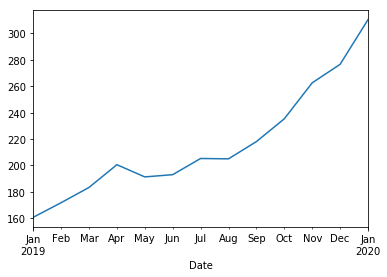

In [6]:
%matplotlib inline
df.resample('M').Close.mean().plot(kind='line')

In [7]:
nodate=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\apple historical data\AAPL2.csv')
nodate.head()

,Open,High,Low,Close,Adj Close,Volume
0,203.169998,204.490005,200.649994,201.550003,200.186111,27316700
1,201.410004,203.130005,201.360001,202.729996,201.358109,16935200
2,203.279999,204.440002,202.690002,204.410004,203.026749,11362000
3,203.350006,205.080002,202.899994,204.229996,202.847961,17265500
4,200.809998,201.399994,198.410004,200.020004,198.666458,25338600


In [8]:
rng=pd.date_range('6/1/2017','6/30/2017',freq='B')
index=pd.DatetimeIndex(rng,name='date')
nodate.set_index(index,inplace=True)
nodate.head()

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2017-06-01,203.169998,204.490005,200.649994,201.550003,200.186111,27316700
2017-06-02,201.410004,203.130005,201.360001,202.729996,201.358109,16935200
2017-06-05,203.279999,204.440002,202.690002,204.410004,203.026749,11362000
2017-06-06,203.350006,205.080002,202.899994,204.229996,202.847961,17265500
2017-06-07,200.809998,201.399994,198.410004,200.020004,198.666458,25338600


In [ ]:
%matplotlib inline
nodate.Close.plot()
nodate["2017-06-01":"2017-06-10"].Close.plot()

In [ ]:
#asfreq method is used to get weekend prices

In [9]:
nodate.asfreq(freq='D',method="pad") #method can be bfill, ffill


,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2017-06-01,203.169998,204.490005,200.649994,201.550003,200.186111,27316700
2017-06-02,201.410004,203.130005,201.360001,202.729996,201.358109,16935200
2017-06-03,201.410004,203.130005,201.360001,202.729996,201.358109,16935200
2017-06-04,201.410004,203.130005,201.360001,202.729996,201.358109,16935200
2017-06-05,203.279999,204.440002,202.690002,204.410004,203.026749,11362000
2017-06-06,203.350006,205.080002,202.899994,204.229996,202.847961,17265500
2017-06-07,200.809998,201.399994,198.410004,200.020004,198.666458,25338600
2017-06-08,199.199997,201.509995,198.809998,201.240005,199.878220,20578000
2017-06-09,201.850006,203.729996,201.559998,203.229996,201.854736,17897100


In [10]:
nodate.asfreq(freq='W',method='pad')

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2017-06-04,201.410004,203.130005,201.360001,202.729996,201.358109,16935200
2017-06-11,201.850006,203.729996,201.559998,203.229996,201.854736,17897100
2017-06-18,204.050003,205.089996,203.270004,203.350006,201.973923,14107500
2017-06-25,207.669998,209.149994,207.169998,208.669998,207.257935,14991600


In [11]:
rng=pd.date_range("06/01/2017",periods=72,freq="B")
rng.shape
import numpy as np
ts=pd.Series(data=np.random.randint(1,10,len(rng)),index=rng,name='ts')
ts.head()

2017-06-01    6
2017-06-02    5
2017-06-05    2
2017-06-06    2
2017-06-07    2
Freq: B, Name: ts, dtype: int32

In [ ]:
data=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\apple historical data\customholiday.csv')
data.head()
data.drop('Date',axis=1,inplace=True)
data.to_csv(r'C:\Users\JOY STARK\Desktop\Datasets\apple historical data\customholidaywithnodate.csv',index=False)

In [ ]:
data=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\apple historical data\customholidaywithnodate.csv')
data.head()
rng=pd.date_range('07/01/2017',"07/21/2017",freq="B")
index=pd.DatetimeIndex(rng)
index

In [12]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
usb=CustomBusinessDay(calendar=USFederalHolidayCalendar())
usb

<CustomBusinessDay>

In [17]:
rng=pd.date_range('07/01/2017',"07/21/2017",freq=usb)
index=pd.DatetimeIndex(rng)
index

DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='C')

In [ ]:
data.set_index(index,inplace=True)
data

In [ ]:
from pandas.tseries.holiday import AbstractHolidayCalendar,nearest_workday,Holiday
class MyBirthdayCalendar(AbstractHolidayCalendar):
    """
    US Federal Government Holiday Calendar based on rules specified by:
    https://www.opm.gov/policy-data-oversight/
       snow-dismissal-procedures/federal-holidays/
    """

    rules = [
        Holiday("Joys Day", month=3, day=18,observance=nearest_workday) #observance=nearest_workday
  ]
    
mycalendar=CustomBusinessDay(calendar=MyBirthdayCalendar())
rng=pd.date_range('03/01/2018',"03/30/2018",freq=mycalendar)
index=pd.DatetimeIndex(rng)
index

In [ ]:
b=CustomBusinessDay( weekmask='Sun Mon Tue Wed Thu',holidays=['2018-03-05'])
rng=pd.date_range('03/01/2018',"03/30/2018",freq=b)
index=pd.DatetimeIndex(rng)
index

In [20]:
data=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\apple historical data\todatetime.csv')
data.head()
data.Date=pd.to_datetime(data.Date,errors='coerce',dayfirst=True) #format=%d$%m$%y
data.head()

,Date,Open,High,Low,Close,Volume
0,2017-07-07,142.90,144.75,142.90,144.18,19201712
1,2017-07-06,143.02,143.50,142.41,142.73,24128782
2,2017-07-05,143.69,144.79,142.72,144.09,21569557
3,2017-07-03,144.88,145.30,143.10,143.50,14277848
4,2017-06-30,144.45,144.96,143.78,144.02,23024107


In [22]:
#epoch format
t=1500000
dt=pd.to_datetime([t],unit='s')
print(dt)
dt.view('int64') 

DatetimeIndex(['1970-01-18 08:40:00'], dtype='datetime64[ns]', freq=None)


array([1500000000000000], dtype=int64)

In [ ]:
#period and periodIndex

In [24]:
y=pd.Period('2016')
y
#dir(y)

Period('2016', 'A-DEC')

In [ ]:
y.start_time
y.weekofyear

In [26]:
m=pd.Period('2024-2',freq='M')
m.start_time
m.end_time

Timestamp('2024-02-29 23:59:59.999999999')

In [ ]:
m+1

In [ ]:
d = pd.Period('2016-02-28', freq='D')
d
d+1

In [27]:
h = pd.Period('2017-08-15 23:00:00',freq='H') 
h+1

Period('2017-08-16 00:00', 'H')

In [ ]:
h

In [ ]:
h+pd.offsets.Hour(2)

In [22]:
import pandas as pd
q1=pd.Period('2017Q1',freq='Q-MAR')

In [23]:
q1.start_time

Timestamp('2016-04-01 00:00:00')

In [19]:
q1.end_time

Timestamp('2017-03-31 23:59:59.999999999')

In [8]:
q1.asfreq(freq='M',how='start')

Period('2017-01', 'M')

In [28]:
idx=pd.period_range('2011','2017',freq='Q-JAN')
#idx=pd.period_range('2011',periods=10,freq='Q-JAN')
idx=pd.PeriodIndex(idx)

In [ ]:
periodseries=pd.Series(np.random.randint(1,10,10),index=idx)
periodseries['2011']
periodseries['2011':'2013']
periodseries=periodseries.to_timestamp()
periodseries=periodseries.to_period()
periodseries

In [36]:
wmt=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\apple historical data\wmt.csv')
wmt.head()
wmt.set_index('Line Item',inplace=True)
wmt=wmt.transpose()
wmt.index=pd.PeriodIndex(wmt.index,freq='Q-JAN')
wmt['start date']=list(map(lambda x: x.start_time,wmt.index))
wmt['end date']=  wmt.index.map(lambda x: x.end_time)
wmt.head()

Line Item,Revenue,Expenses,Profit,start date,end date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


In [38]:
#wmt['end date']=pd.PeriodIndex(wmt['end date'])
wmt['end date']=wmt['end date'].map(lambda x:x.end_time)
wmt.head()

Line Item,Revenue,Expenses,Profit,start date,end date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


In [ ]:
#wmt['end date'] = [tt.to_timestamp() if type(tt)==pd.Period else pd.to_datetime(tt) for tt in wmt['end date']]
wmt['end date'] =[i.end_time for i in wmt['end date']]
wmt.head()

In [41]:
wmt.index=wmt.index.to_period()
#wmt.index=wmt.index.to_timestamp()
wmt

Line Item,Revenue,Expenses,Profit,start date,end date
2016Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2016Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2016Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2016Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2017Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


In [45]:
data=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\timezone_codebasics\timezone.csv',header=1,index_col='Date Time')
data.head()
data.index=pd.to_datetime(data.index)
data.head()
data.index

DatetimeIndex(['2017-08-17 09:00:00', '2017-08-17 09:15:00',
               '2017-08-17 09:30:00', '2017-08-17 10:00:00',
               '2017-08-17 10:30:00', '2017-08-17 11:00:00'],
              dtype='datetime64[ns]', name='Date Time', freq=None)

In [46]:
data=data.tz_localize(tz='US/Eastern')
data.index

DatetimeIndex(['2017-08-17 09:00:00-04:00', '2017-08-17 09:15:00-04:00',
               '2017-08-17 09:30:00-04:00', '2017-08-17 10:00:00-04:00',
               '2017-08-17 10:30:00-04:00', '2017-08-17 11:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Date Time', freq=None)

In [49]:
data=data.tz_convert(tz='Europe/Berlin')
data

,Price
Date Time,
2017-08-17 15:00:00+02:00,72.38
2017-08-17 15:15:00+02:00,71.00
2017-08-17 15:30:00+02:00,71.67
2017-08-17 16:00:00+02:00,72.80
2017-08-17 16:30:00+02:00,73.00
2017-08-17 17:00:00+02:00,72.50


In [48]:
from pytz import all_timezones
all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [50]:
data=data.tz_convert(tz='Asia/Calcutta')
data

,Price
Date Time,
2017-08-17 18:30:00+05:30,72.38
2017-08-17 18:45:00+05:30,71.00
2017-08-17 19:00:00+05:30,71.67
2017-08-17 19:30:00+05:30,72.80
2017-08-17 20:00:00+05:30,73.00
2017-08-17 20:30:00+05:30,72.50


In [51]:
rng=pd.date_range('1-01-2017',periods=10,freq='H',tz='Europe/Berlin')
rng

DatetimeIndex(['2017-01-01 00:00:00+01:00', '2017-01-01 01:00:00+01:00',
               '2017-01-01 02:00:00+01:00', '2017-01-01 03:00:00+01:00',
               '2017-01-01 04:00:00+01:00', '2017-01-01 05:00:00+01:00',
               '2017-01-01 06:00:00+01:00', '2017-01-01 07:00:00+01:00',
               '2017-01-01 08:00:00+01:00', '2017-01-01 09:00:00+01:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq='H')

In [52]:
rng=pd.date_range('22-08-2017 09:00:00',periods=10,freq='30min')
rng
tseries=pd.Series(range(10),index=rng)
tseries

2017-08-22 09:00:00    0
2017-08-22 09:30:00    1
2017-08-22 10:00:00    2
2017-08-22 10:30:00    3
2017-08-22 11:00:00    4
2017-08-22 11:30:00    5
2017-08-22 12:00:00    6
2017-08-22 12:30:00    7
2017-08-22 13:00:00    8
2017-08-22 13:30:00    9
Freq: 30T, dtype: int64

In [53]:
b=tseries.tz_localize(tz='Europe/Berlin')
b
n=tseries.tz_localize(tz='Asia/Calcutta')
n
b+n

2017-08-22 03:30:00+00:00     NaN
2017-08-22 04:00:00+00:00     NaN
2017-08-22 04:30:00+00:00     NaN
2017-08-22 05:00:00+00:00     NaN
2017-08-22 05:30:00+00:00     NaN
2017-08-22 06:00:00+00:00     NaN
2017-08-22 06:30:00+00:00     NaN
2017-08-22 07:00:00+00:00     7.0
2017-08-22 07:30:00+00:00     9.0
2017-08-22 08:00:00+00:00    11.0
2017-08-22 08:30:00+00:00     NaN
2017-08-22 09:00:00+00:00     NaN
2017-08-22 09:30:00+00:00     NaN
2017-08-22 10:00:00+00:00     NaN
2017-08-22 10:30:00+00:00     NaN
2017-08-22 11:00:00+00:00     NaN
2017-08-22 11:30:00+00:00     NaN
Freq: 30T, dtype: float64

In [ ]:
#shifting and lagging

In [54]:
import pandas as pd
data=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\shift_lag_codebasics\shift_lag.csv',index_col='Date')
data

,Price
Date,
15-Aug-17,171.00
16-Aug-17,170.00
17-Aug-17,166.91
18-Aug-17,167.41
21-Aug-17,167.78
22-Aug-17,169.64
23-Aug-17,168.71
24-Aug-17,167.74
25-Aug-17,166.32


In [55]:
data.shift(-1)

,Price
Date,
15-Aug-17,170.00
16-Aug-17,166.91
17-Aug-17,167.41
18-Aug-17,167.78
21-Aug-17,169.64
22-Aug-17,168.71
23-Aug-17,167.74
24-Aug-17,166.32
25-Aug-17,167.24


In [56]:
data['prev_day_price']=data.Price.shift(1)
data

,Price,prev_day_price
Date,,
15-Aug-17,171.00,NaN
16-Aug-17,170.00,171.00
17-Aug-17,166.91,170.00
18-Aug-17,167.41,166.91
21-Aug-17,167.78,167.41
22-Aug-17,169.64,167.78
23-Aug-17,168.71,169.64
24-Aug-17,167.74,168.71
25-Aug-17,166.32,167.74


In [58]:
import numpy as np
data.replace({
    'prev_day_price':np.NaN
},0,inplace=True)
data

,Price,prev_day_price
Date,,
15-Aug-17,171.00,0.00
16-Aug-17,170.00,171.00
17-Aug-17,166.91,170.00
18-Aug-17,167.41,166.91
21-Aug-17,167.78,167.41
22-Aug-17,169.64,167.78
23-Aug-17,168.71,169.64
24-Aug-17,167.74,168.71
25-Aug-17,166.32,167.74


In [59]:
l=[]
for i in range(len(data.Price)):
    l.append(data.Price[i]-data.prev_day_price[i])

data['change']=l
data


,Price,prev_day_price,change
Date,,,
15-Aug-17,171.00,0.00,171.00
16-Aug-17,170.00,171.00,-1.00
17-Aug-17,166.91,170.00,-3.09
18-Aug-17,167.41,166.91,0.50
21-Aug-17,167.78,167.41,0.37
22-Aug-17,169.64,167.78,1.86
23-Aug-17,168.71,169.64,-0.93
24-Aug-17,167.74,168.71,-0.97
25-Aug-17,166.32,167.74,-1.42


In [60]:
data['changes']=data.Price-data['prev_day_price']
data

,Price,prev_day_price,change,changes
Date,,,,
15-Aug-17,171.00,0.00,171.00,171.00
16-Aug-17,170.00,171.00,-1.00,-1.00
17-Aug-17,166.91,170.00,-3.09,-3.09
18-Aug-17,167.41,166.91,0.50,0.50
21-Aug-17,167.78,167.41,0.37,0.37
22-Aug-17,169.64,167.78,1.86,1.86
23-Aug-17,168.71,169.64,-0.93,-0.93
24-Aug-17,167.74,168.71,-0.97,-0.97
25-Aug-17,166.32,167.74,-1.42,-1.42


In [61]:
data['change_percent']=((data.change)/(data.Price))*100.00
data

,Price,prev_day_price,change,changes,change_percent
Date,,,,,
15-Aug-17,171.00,0.00,171.00,171.00,100.000000
16-Aug-17,170.00,171.00,-1.00,-1.00,-0.588235
17-Aug-17,166.91,170.00,-3.09,-3.09,-1.851297
18-Aug-17,167.41,166.91,0.50,0.50,0.298668
21-Aug-17,167.78,167.41,0.37,0.37,0.220527
22-Aug-17,169.64,167.78,1.86,1.86,1.096440
23-Aug-17,168.71,169.64,-0.93,-0.93,-0.551242
24-Aug-17,167.74,168.71,-0.97,-0.97,-0.578276
25-Aug-17,166.32,167.74,-1.42,-1.42,-0.853776


In [62]:
data.loc['15-Aug-17']['change_percent']=0

In [76]:
data.index=pd.DatetimeIndex(data.index,freq='B')
data

,Price,prev_day_price,change,changes,change_percent
Date,,,,,
2017-08-15,171.00,0.00,171.00,171.00,0.000000
2017-08-16,170.00,171.00,-1.00,-1.00,-0.588235
2017-08-17,166.91,170.00,-3.09,-3.09,-1.851297
2017-08-18,167.41,166.91,0.50,0.50,0.298668
2017-08-21,167.78,167.41,0.37,0.37,0.220527
2017-08-22,169.64,167.78,1.86,1.86,1.096440
2017-08-23,168.71,169.64,-0.93,-0.93,-0.551242
2017-08-24,167.74,168.71,-0.97,-0.97,-0.578276
2017-08-25,166.32,167.74,-1.42,-1.42,-0.853776


In [77]:
data.tshift(1)

,Price,prev_day_price,change,changes,change_percent
Date,,,,,
2017-08-16,171.00,0.00,171.00,171.00,0.000000
2017-08-17,170.00,171.00,-1.00,-1.00,-0.588235
2017-08-18,166.91,170.00,-3.09,-3.09,-1.851297
2017-08-21,167.41,166.91,0.50,0.50,0.298668
2017-08-22,167.78,167.41,0.37,0.37,0.220527
2017-08-23,169.64,167.78,1.86,1.86,1.096440
2017-08-24,168.71,169.64,-0.93,-0.93,-0.551242
2017-08-25,167.74,168.71,-0.97,-0.97,-0.578276
2017-08-28,166.32,167.74,-1.42,-1.42,-0.853776


In [ ]:
data['pct_change']=data.Price.pct_change()
data

In [ ]:
date=pd.date_range('15-08-2017','28-08-2017',freq='B')
date=pd.DatetimeIndex(date)
d=[i for i in range(10)]
d=pd.Series(data=d,index=date)
d

In [ ]:
dff=data
dff.index=pd.DatetimeIndex(dff.index)
dff=pd.concat((data,d),axis=1)
dff

In [ ]:
dff.rename(columns={0:'values'},inplace=True)

In [ ]:
dff.sort_values('Price',inplace=True)

In [ ]:
dff

In [ ]:
dff.sort_index()

In [1]:
import pandas as pd
d = {'num_legs': [4, 4, 2, 2],
     'num_wings': [0, 0, 2, 2],
     'class': ['mammal', 'mammal', 'mammal', 'bird'],
     'animal': ['cat', 'dog', 'bat', 'penguin'],
     'locomotion': ['walks', 'walks', 'flies', 'walks']}
df = pd.DataFrame(data=d)
df = df.set_index(['class', 'animal', 'locomotion'])
df

num_legs  num_wings
class  animal  locomotion                     
mammal cat     walks              4          0
       dog     walks              4          0
       bat     flies              2          2
bird   penguin walks              2          2

In [10]:
df.xs(('bird', 'walks'),
      level=[0, 2])


,num_legs,num_wings
animal,,
penguin,2,2


In [6]:
df.xs('mammal', level=0)

,,num_legs,num_wings
animal,locomotion,,
cat,walks,4,0
dog,walks,4,0
bat,flies,2,2
